In [1]:
# mary

from neurotron import Cells, Train, Toy, Monitor, Ansi, SynapseErr
import neurotron.math as nm
isa = isinstance

In [6]:
class Trainer(Train):
    def __init__(self,cells,plot=False):
        super().__init__(cells)
        self.plotting = plot

    def prediction(self,context):
        if context in self._contexts:
            info = self._contexts[context]
            counters = []; total = 0
            for key in info:
                if not key in ['#','@']:
                    n,refer,idx = info[key]
                    total += n
                    counters.append(n)
                    #print('    statistics: %s:' % key,(counters,total))
            result = []; k = 0
            src = self.address(context)
            for key in info:
                if not key in ['#','@']:
                    ratio = counters[k]/total
                    k += 1
                    n,refer,idx = info[key]
                    dst = self.address(refer)
                    result.append((refer,ratio,src,dst))
                    #print('    predict(%g%%): %s ->'%(100*ratio,key),info[key])
            return result

    def predict(self,context):
        results = self.prediction(context)
        for prediction in results:
            refer,ratio,src,dst = prediction
            print('    %g%%: ->' % (100*ratio),refer,src,dst)
    
    def address(self,context):
        if context in self._contexts:
            info = self._contexts[context]
            #print('##### info:',info)
            m,n,d,s = self.cells.shape
            idx = train.code((info['@'][1])).list()[0]; 
            jdx = info['#'][0]
            assert len(idx) == len(jdx)
            kdx = [jdx[s]*m+idx[s] for s in range(len(idx))]
            #return ((m,n),idx,jdx,kdx)
            return kdx
        return None

    def learn(self,context):
        results = self.prediction(context)
        for prediction in results:
            refer,ratio,src,dst = prediction
            print('    %g%%: ->' % (100*ratio),refer,src,dst)
            self.cells.init()
            for k in dst:
                self.cells.X[k] = 1
            for k in src:
                self.cells.Y[k] = 1

            self.cells.connect(src,dst)
            title = 'learn: ' + refer
            if self.plotting: self.plot(title)
            self.cells.init()

    def program(self,verbose=0):   # learn all contexts
        """
        learn all contexts
        >>> train = Trainer(Cells('Mary'))
        >>> train.program()
        """
        for context in self._contexts:
            results = self.prediction(context)
            for prediction in results:
                refer,ratio,src,dst = prediction
                #print('    %g%%: ->' % (100*ratio),refer,src,dst)
                for k in dst:
                    self.cells.X[k] = 1
                for k in src:
                    self.cells.Y[k] = 1
                try:
                    self.cells.connect(src,dst)
                    if verbose:
                        print(Ansi.G + '    learning:',context,'OK'+Ansi.N)
                except SynapseErr:
                    print(Ansi.R+'    learning:',context,'FAIL'+Ansi.N)

    def plot(self,title=''):
        m,n,d,s = self.cells.shape
        mon = Monitor(m,n)
        self.cells.plot(mon,label=True)
        mon.title(title)

    def analyse(self,sentence,all=False):
        if all:
            prediction = self.cells.process(sentence)
        else:
            prediction = self.cells.run(sentence)
            self.plot()
        return prediction
        

    20%: -> <Lisa likes to paint> [6, 14, 16] [10, 12, 14]
    80%: -> <Lisa likes to dance> [6, 14, 16] [8, 12, 14]


['Lisa', '->', 'likes', 'to', '', '.']

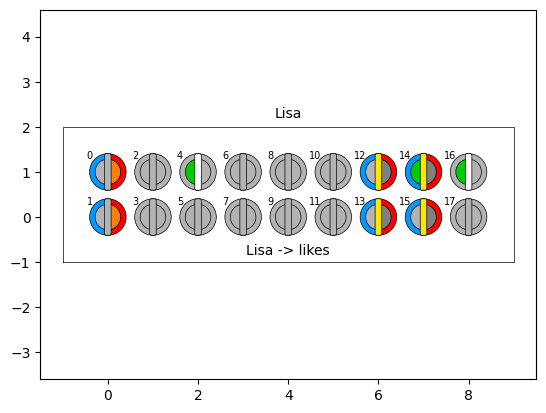

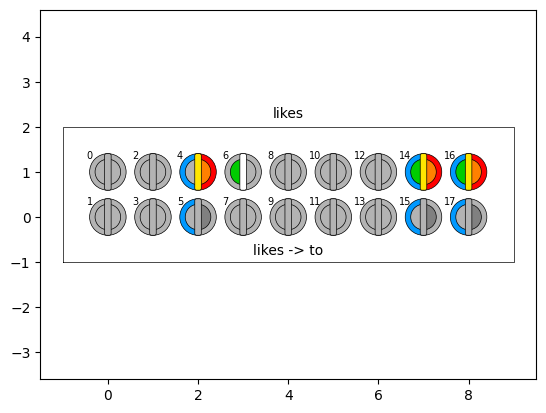

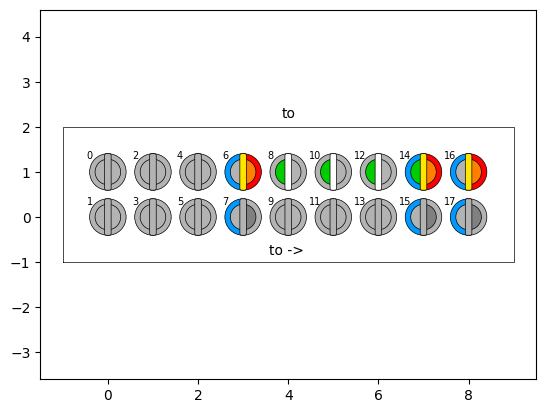

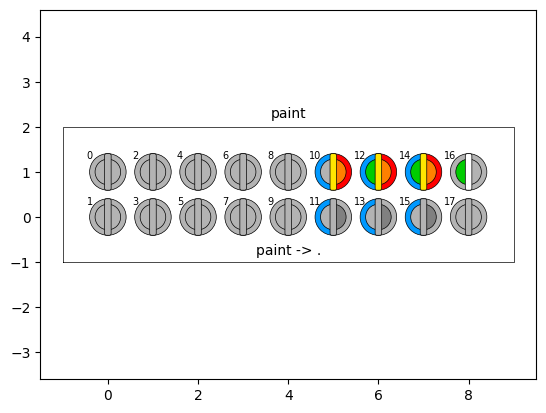

In [12]:
cells = Cells((2,9,10,3),Toy('Mary').token,verbose=0)
train = Trainer(cells,plot=True)
train('Lisa likes to paint .',2)
train('Lisa likes to dance .',8)
train('Mary likes to sing .',5)
train.predict('<Lisa likes to>')
train.program()

train.analyse('Lisa likes to paint',all=True)

In [8]:
train.program()

In [9]:
train.cells._predict.K.map()

+-000/0-+-002/2-+-004/4-+-006/6-+-008/8-+-010/A-+-012/C-+-014/E-+-016/G-+
|  000  |  000  |  0CE  |  4EG  |  6EG  |  6EG  |  6EG  |  0CE  |  0CE  |
|  000  |  000  |  000  |  000  |  7EG  |  000  |  ACE  |  4EG  |  4EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  8EG  |  6EG  |  ACE  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  ACE  |  8CE  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  8CE  |  0EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  0EG  |  5EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  5EG  |  7EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  7EG  |  8EG  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
|  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |  000  |
+-001/1-+-003/3-+-005/5-+-007/7-+-009/9-+-011/B-+-013/D-+-015/F-+-017/H-+
|  000  |  000  |  0EG  |  5EG  |  000  |  000  |  8CE  |  8EG  |  000  |
|  000  |  000  |  000  |  000  |  000

['likes', '->', 'to']

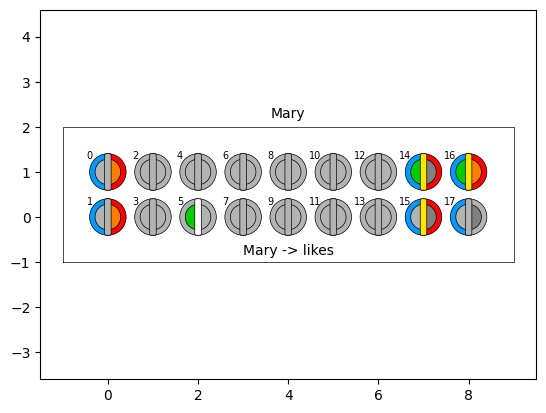

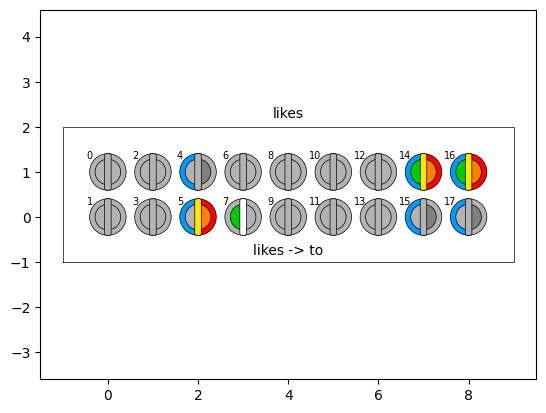

In [10]:
cells.process('Mary')
cells.process('likes')

['to', '->', '']

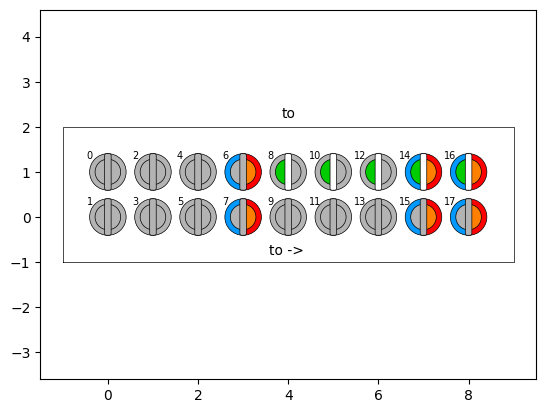

In [12]:
cells.init()
cells.process('to')

In [8]:
cells.token('Hugo')
cells.token

{'Mary': [1, 0, 0, 0, 0, 0, 0, 1, 1],
 'John': [0, 1, 0, 0, 0, 0, 0, 1, 1],
 'Lisa': [1, 0, 0, 0, 0, 0, 1, 1, 0],
 'Andy': [0, 1, 0, 0, 0, 0, 1, 1, 0],
 'likes': [0, 0, 1, 0, 0, 0, 0, 1, 1],
 'to': [0, 0, 0, 1, 0, 0, 0, 1, 1],
 'sing': [0, 0, 0, 0, 1, 0, 0, 1, 1],
 'dance': [0, 0, 0, 0, 1, 0, 1, 1, 0],
 'hike': [0, 0, 0, 0, 0, 1, 0, 1, 1],
 'paint': [0, 0, 0, 0, 0, 1, 1, 1, 0],
 'climb': [0, 0, 0, 0, 1, 0, 1, 1, 0],
 '.': [0, 0, 0, 0, 0, 0, 1, 1, 1],
 'Hugo': [1, 0, 0, 0, 0, 1, 0, 0, 1]}

In [11]:
train('Hugo loves soda .')

'<Hugo loves soda .>'

In [12]:
train.program()

    learning: <Lisa> OK
    learning: <Lisa likes> OK
    learning: <Lisa likes to> OK
    learning: <Lisa likes to> OK
    learning: <Lisa likes to paint> OK
    learning: <Lisa likes to dance> OK
    learning: <Mary> OK
    learning: <Mary likes> OK
    learning: <Mary likes to> OK
    learning: <Mary likes to sing> OK
    learning: <Hugo> OK
    learning: <Hugo loves> OK
    learning: <Hugo loves soda> OK


In [14]:
cells = Cells((2,9,10,3),Toy('Mary').token,verbose=0)
train = Trainer(cells,plot=True)
train(['Lisa','likes','to','paint','.'])


AttributeError: 'list' object has no attribute 'split'